                            Project Title: Predicting House Prices

Importing Necessary Libraries

In [26]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso

Loading and Examining Dataset

In [27]:
house_data = pd.read_csv("C:\\Users\\DC\\Downloads\\HousingPrices-Amsterdam-August-2021.csv")

#Look at the first 5 rows
house_data.head()

Unnamed: 0                                 Address      Zip     Price  \
0           1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0   
1           2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0   
2           3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   
3           4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   
4           5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   

   Area  Room       Lon        Lat  
0    64     3  4.907736  52.356157  
1    60     3  4.850476  52.348586  
2   109     4  4.944774  52.343782  
3   128     6  4.789928  52.343712  
4   138     5  4.902503  52.410538

In [28]:
house_data.rename(columns={'Unnamed: 0':'SrNo'},inplace=True)
house_data.head()

SrNo                                 Address      Zip     Price  Area  \
0     1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0    64   
1     2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0    60   
2     3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   109   
3     4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   128   
4     5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   138   

   Room       Lon        Lat  
0     3  4.907736  52.356157  
1     3  4.850476  52.348586  
2     4  4.944774  52.343782  
3     6  4.789928  52.343712  
4     5  4.902503  52.410538

In [29]:
# Look at basic Statistics

house_data.describe()

SrNo         Price        Area        Room         Lon  \
count  924.000000  9.200000e+02  924.000000  924.000000  924.000000   
mean   462.500000  6.220654e+05   95.952381    3.571429    4.888605   
std    266.880123  5.389942e+05   57.447436    1.592332    0.053140   
min      1.000000  1.750000e+05   21.000000    1.000000    4.644819   
25%    231.750000  3.500000e+05   60.750000    3.000000    4.855834   
50%    462.500000  4.670000e+05   83.000000    3.000000    4.886818   
75%    693.250000  7.000000e+05  113.000000    4.000000    4.922337   
max    924.000000  5.950000e+06  623.000000   14.000000    5.029122   

              Lat  
count  924.000000  
mean    52.363326  
std      0.024028  
min     52.291519  
25%     52.352077  
50%     52.364631  
75%     52.377598  
max     52.423805

Data Preprocessing: Clean the data by handling missing values, outliers, and 
converting categorical variables into numerical format.

In [30]:
# Checking for any column contaning a null value
# Only 1 columns exists that have atleast one null value 

print(house_data.isnull().any().sum())

# Name of columns contaning a null value 

house_data.columns[house_data.isnull().any()]

1


Index(['Price'], dtype='object')

In [31]:
# Fill null values in Price column with the mean value
house_data['Price'].fillna(house_data['Price'].mean(),inplace=True)

# No null values remaining
house_data.isnull().any().sum()

0

In [32]:
# No duplicate value in entire dataset
house_data.duplicated().sum()

0

In [33]:
# Detecting and Removing Z-scores
z_score_cols = ['Price', 'Area', 'Room']

zscores = house_data[z_score_cols].apply(stats.zscore)
print(zscores)

outlier_rows = (zscores > 3).any(axis=1)
print(outlier_rows.sum())

house_data = house_data.drop(house_data[outlier_rows].index)

house_data.reset_index(drop=True,inplace=True)
house_data

        Price      Area      Room
0    0.117080 -0.556503 -0.359057
1   -0.273593 -0.626170 -0.359057
2    0.424038  0.227246  0.269293
3   -0.078256  0.558162  1.525993
4    0.182192  0.732328  0.897643
..        ...       ...       ...
919  0.238003  0.366579 -1.615757
920 -0.506136 -0.417170 -0.359057
921 -0.506136 -0.782920 -0.359057
922 -0.042910  0.296912  0.269293
923 -0.599154 -0.295254  0.269293

[924 rows x 3 columns]
26


SrNo                                 Address      Zip     Price  Area  \
0       1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0    64   
1       2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0    60   
2       3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   109   
3       4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   128   
4       5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   138   
..    ...                                     ...      ...       ...   ...   
893   920                     Ringdijk, Amsterdam  1097 AE  750000.0   117   
894   921         Kleine Beerstraat 31, Amsterdam  1033 CP  350000.0    72   
895   922       Stuyvesantstraat 33 II, Amsterdam  1058 AK  350000.0    51   
896   923   John Blankensteinstraat 51, Amsterdam  1095 MB  599000.0   113   
897   924      S. F. van Ossstraat 334, Amsterdam  1068 JS  300000.0    79   

     Room       Lon        Lat  
0       3  4.907736  52.356157  
1       3  4.850476  52.348586  
2       4  4.944774  52.343782  
3       6  4.789928  52.343712  
4       5  4.902503  52.410538  
..    ...       ...        ...  
893     1  4.927757  52.354173  
894     3  4.890612  52.414587  
895     3  4.856935  52.363256  
896     4  4.965731  52.375268  
897     4  4.810678  52.355493  

[898 rows x 8 columns]

Visualization: Create visualizations, such as scatter plots or regression plots, to visualize 
the relationships between individual features and house prices.

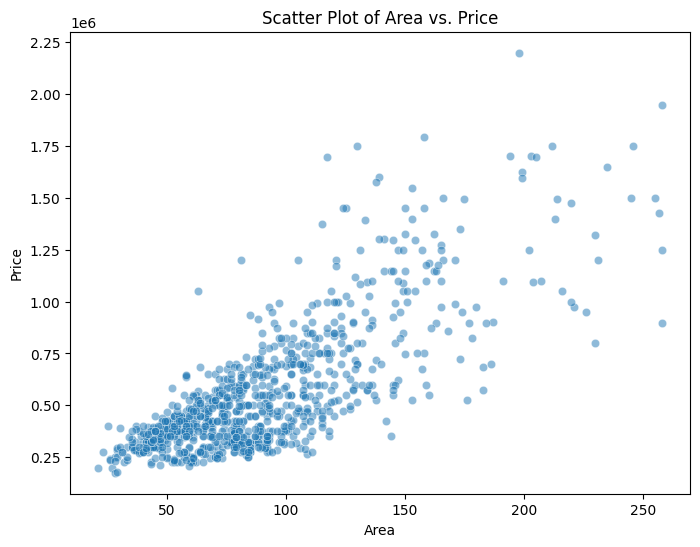

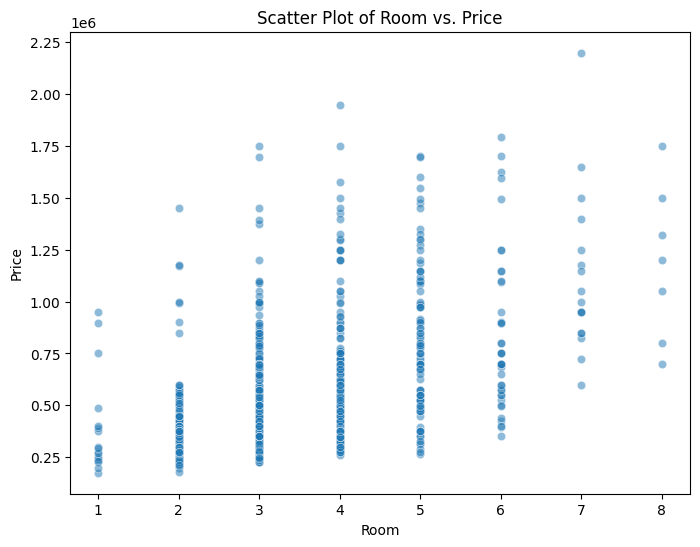

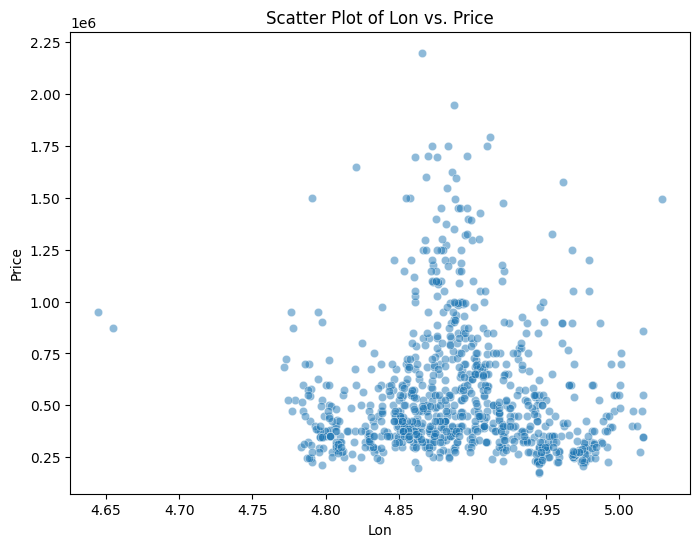

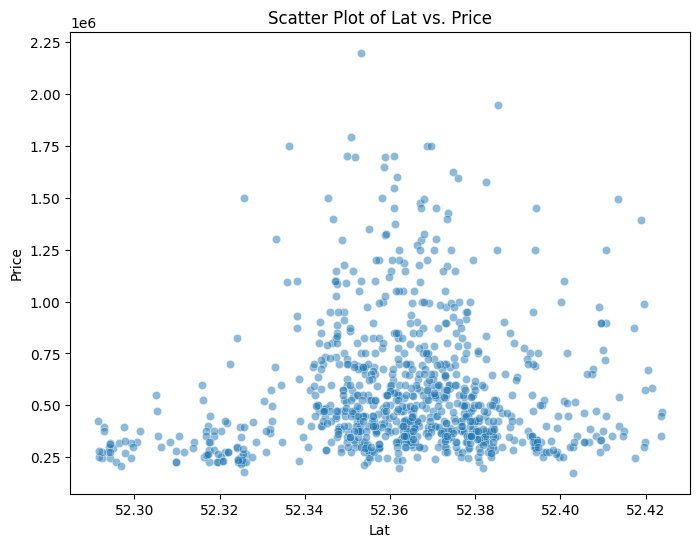

In [34]:
selected_features = ['Area', 'Room', 'Lon', 'Lat']

# Create scatter plots for each selected feature vs. 'Price'
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=house_data[feature], y=house_data['Price'], alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

Feature Selection: Choose relevant features using feature importance techniques

In [35]:
X=house_data.drop(['Price','Address','Zip','SrNo'],axis=1)
y=house_data['Price']

In [36]:
Bestfeatures = SelectKBest(score_func=f_regression, k=4)
fit = Bestfeatures.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featurescores = pd.concat([dfcolumns, dfscores], axis=1)
featurescores.columns = ['Specs', 'Scores']
# print(featurescores.nlargest(4, 'Scores'))

Bestcol = featurescores.nlargest(4, 'Scores')
Bestcol = Bestcol.Specs
Bestcol = X[Bestcol]
print(Bestcol.columns)

Index(['Area', 'Room', 'Lat', 'Lon'], dtype='object')


Data Split: Split your dataset into a training set and a testing set.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(Bestcol, y, test_size=0.2, random_state=42)

Model Selection: Select a regression algorithm such as Linear Regression, Decision Tree 
Regression, or Random Forest Regression for this project

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Model Training: Train your chosen regression model on the training data.

In [39]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)

model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr.fit(X_train,y_train)
y_pred_dtr = model_dtr.predict(X_test)

model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train,y_train)
y_pred_rfr = model_rfr.predict(X_test)

Model Evaluation: Evaluate the model's performance on the testing data using metric Root Mean Squared 
Error (RMSE).

In [40]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'Root Mean Squared Error (RMSE) of Linear Regression: {rmse_lr:.2f}')

rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
print(f'Root Mean Squared Error (RMSE) of Decision Tree Regression: {rmse_dtr:.2f}')

rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
print(f'Root Mean Squared Error (RMSE) of Random Forest Regression: {rmse_rfr:.2f}')

Root Mean Squared Error (RMSE) of Linear Regression: 164787.97
Root Mean Squared Error (RMSE) of Decision Tree Regression: 159948.82
Root Mean Squared Error (RMSE) of Random Forest Regression: 111026.20


Visual Comparison of RMSE Scores for Different Algorithms

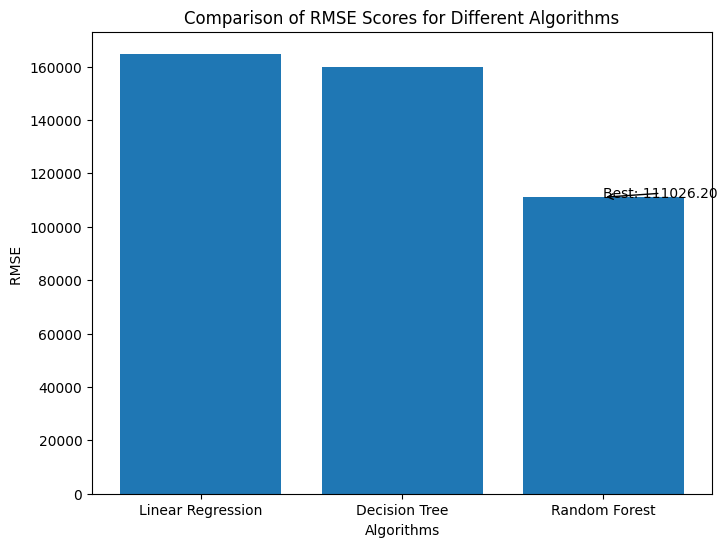

In [41]:
rmse_scores = [rmse_lr, rmse_dtr, rmse_rfr]
algorithms = ['Linear Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(8, 6))
plt.bar(algorithms, rmse_scores)
plt.xlabel('Algorithms')
plt.ylabel('RMSE ')
plt.title('Comparison of RMSE Scores for Different Algorithms')

# Annotate the highest RMSE score
best_algorithm_index = np.argmin(rmse_scores)
best_algorithm_score = rmse_scores[best_algorithm_index]
plt.annotate(f'Best: {best_algorithm_score:.2f}', xy=(best_algorithm_index, best_algorithm_score),
             xytext=(best_algorithm_index, best_algorithm_score + 5),
             arrowprops=dict(arrowstyle='->'))

plt.show()

Model Tuning: Experiment with different hyperparameters of the regression model to 
see if you can improve its predictive accuracy.

Linear Regression

In [42]:
# Define a range of hyperparameter values to experiment with
fit_intercept_values = [True, False]

best_rmse = float('inf')  # Initialize with a large value

for fit_intercept in fit_intercept_values:
    # Create a Linear Regression model with the current hyperparameters
    lr_model = LinearRegression(fit_intercept=fit_intercept)
    
    # Train the model on the training data
    lr_model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred_lr = lr_model.predict(X_test)
    
    # Calculate RMSE for this configuration
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
    
    # Check if this configuration gives a better RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = {'fit_intercept': fit_intercept}

print("Best Hyperparameters for Linear Regression:", best_params)
print(f'Best RMSE:, {best_rmse:.2f}')

Best Hyperparameters for Linear Regression: {'fit_intercept': True}
Best RMSE:, 164787.97


Decision tree Regression

In [43]:
# Create a dictionary of hyperparameters to tune for Decision Tree Regression

param_grid_dtr = {
    'max_depth': [None, 10, 20, 30],  # Adjust the range of max_depth values as needed
    'min_samples_split': [2, 5, 10]  # Adjust the range of min_samples_split values as needed
}

# Create a GridSearchCV object for Decision Tree Regression
grid_search_dtr = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid_dtr, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV to the data
grid_search_dtr.fit(X_train, y_train)

# Get the best hyperparameters for Decision Tree Regression
best_params_dtr = grid_search_dtr.best_params_
print("Best Hyperparameters for Decision Tree Regression:", best_params_dtr)

best_max_depth = best_params_dtr['max_depth']
best_min_samples_split = best_params_dtr['min_samples_split']

# Create a new Decision Tree Regression model with the best hyperparameters
best_dtr_model = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)

# Fit the model to the training data
best_dtr_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_dtr = best_dtr_model.predict(X_test)

# Calculate RMSE
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))

print(f'RMSE for Decision Tree Regression with Best Hyperparameters:, {rmse_dtr: .2f}')

Best Hyperparameters for Decision Tree Regression: {'max_depth': 10, 'min_samples_split': 10}
RMSE for Decision Tree Regression with Best Hyperparameters:,  143447.93


Random Forest Regression

In [24]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create a Random Forest Regressor model
model_rfr = RandomForestRegressor(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model_rfr, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Predict using the best model
y_pred_rfr_tuned = best_model.predict(X_test)

# Calculate RMSE
rmse_rfr_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rfr_tuned))

print(f'Best hyperparameters: {best_params}')
print(f'Root Mean Squared Error (RMSE) of Random Forest Regression (Tuned): {rmse_rfr_tuned:.2f}')


Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
Root Mean Squared Error (RMSE) of Random Forest Regression (Tuned): 114141.64


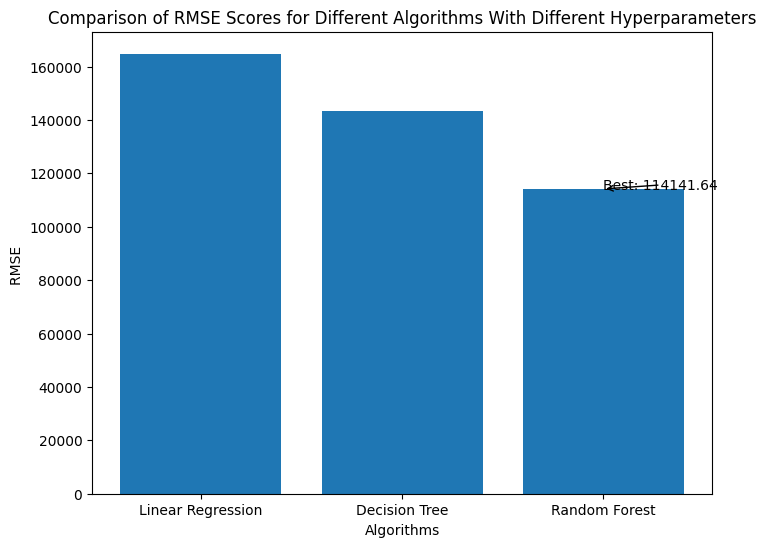

In [44]:
rmse_scores = [best_rmse, rmse_dtr, rmse_rfr_tuned]
algorithms = ['Linear Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(8, 6))
plt.bar(algorithms, rmse_scores)
plt.xlabel('Algorithms')
plt.ylabel('RMSE ')
plt.title('Comparison of RMSE Scores for Different Algorithms With Different Hyperparameters')

# Annotate the highest RMSE score
best_algorithm_index = np.argmin(rmse_scores)
best_algorithm_score = rmse_scores[best_algorithm_index]
plt.annotate(f'Best: {best_algorithm_score:.2f}', xy=(best_algorithm_index, best_algorithm_score),
             xytext=(best_algorithm_index, best_algorithm_score + 5),
             arrowprops=dict(arrowstyle='->'))

plt.show()